In [1]:
from io import StringIO
from PIL import Image
import numpy as np
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import os
from skimage.color import rgb2gray
#np.asarray(Image.open(StringIO(rawdata)))
from sklearn.decomposition import PCA

from os.path import isfile, join
from sklearn.model_selection import train_test_split

#from imblearn.over_sampling import RandomOverSampler
from ImagesProcessingFunctions1 import *
from sklearn.model_selection import train_test_split
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import timeit
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import timeit

### loading the labels

In [2]:
mypath = "/Users/jenifervivar/Desktop/Desktop - jenifer’s MacBook Air/Machine_learning_code/crop_part1/"
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath  + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns)
filedfnona = filedf.dropna()
filedfnona['age']  = filedfnona['age'].astype(int)
filedfnona['race'] = filedfnona['race'].astype(int)
filedfnona['gender'] = filedfnona['gender'].astype(int)

#### making all the images black and white

In [3]:
images = []
for img in filedfnona['file']:
    image = plt.imread(img)
    image = rgb2gray(image)
    images.append(image)

In [4]:
print(len(images), len(filedfnona))

9777 9777


In [5]:
def confusion_plot(y_test, y_pred, title, labelsx, labelsy):
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix, annot=True, fmt = 'd', cmap='Blues')

    ax.set_title(title);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(labelsx)
    ax.yaxis.set_ticklabels(labelsy)

## Display the visualization of the Confusion Matrix.
    plt.show()

### using pca to reduce features in my images and precerving 300 features

In [6]:
def randomForest_pca(imagesArray, labelsToPredict):
    
    model=RandomForestClassifier()
    X_train, X_test, y_train, y_test = train_test_split(np.array(imagesArray), labelsToPredict)
    
    #flattening the images
    nsamples, nx, ny= X_train.shape
    X_train2 = X_train.reshape((nsamples,nx*ny))
    
    #only reducing X_train subset for now
    pca = PCA(n_components = 195)
    reduced_images = pca.fit_transform(X_train2)
    recovered_images = pca.inverse_transform(reduced_images)
    model.fit(recovered_images,y_train)
    
    #now doing the same for testing subset
    nsamples, nx, ny= X_test.shape
    X_test2 = X_test.reshape((nsamples,nx*ny))
    reduced_images_test = pca.fit_transform(X_test2)
    recovered_images_test = pca.inverse_transform(reduced_images_test)
    #model.fit(recovered_images_test,y_test)
    
    y_pred=model.predict(recovered_images_test)
    
    return y_pred, y_test

In [7]:
def randomForest(imagesArray, labelsToPredict):
    
    model=RandomForestClassifier()
    X_train, X_test, y_train, y_test = train_test_split(np.array(imagesArray), labelsToPredict)
    
    #flattening the images
    nsamples, nx, ny= X_train.shape
    X_train2 = X_train.reshape((nsamples,nx*ny))
    
    #only reducing X_train subset for now
    #pca = PCA(n_components = 195)
    #reduced_images = pca.fit_transform(X_train2)
    #recovered_images = pca.inverse_transform(reduced_images)
    #model.fit(recovered_images,y_train)
    model.fit(X_train2, y_train)
    #now doing the same for testing subset
    nsamples, nx, ny= X_test.shape
    X_test2 = X_test.reshape((nsamples,nx*ny))
    #reduced_images_test = pca.fit_transform(X_test2)
    #recovered_images_test = pca.inverse_transform(reduced_images_test)
    #model.fit(recovered_images_test,y_test)
    
    #y_pred=model.predict(recovered_images_test)
    y_pred = model.predict(X_test2)
    
    return y_pred, y_test

In [ ]:
starttime = timeit.default_timer()
print("The start time is :",starttime)
y_pred_gender, y_test_gender = randomForest_pca(np.array(images), filedfnona['gender'])
print("The time difference is :", timeit.default_timer() - starttime)
print(classification_report(y_pred_gender,y_test_gender))
print(confusion_matrix(y_pred_gender,y_test_gender))
t = "Predictions on Gender Labels with Accuracy = 75"
x = ['Male', "Female"]

confusion_plot(y_test_gender, y_pred_gender, t, x, x)
score = accuracy_score(y_pred_gender,y_test_gender)
#scores.append(scorle

fig = plt.figure(figsize=(15, 10))

The start time is : 294.419105042


In [ ]:
fpr, tpr, _ = roc_curve(y_test_gender,  y_pred_gender)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print(_)

#hard one

y_pred_age, y_test_age = randomForest_pca(np.array(images), filedfnona['age'])
accuracy_score(y_pred_age,y_test_age)
print(classification_report(y_pred_age,y_test_age))
print(confusion_matrix(y_pred_age,y_test_age))
#ignore because is confusing
#confusion_plot(y_test_age, y_pred_age)
score = accuracy_score(y_pred_age,y_test_age)
#scores.append(score)

#fig = plt.figure(figsize=(15, 10))

In [9]:
starttime = timeit.default_timer()
print("The start time is :",starttime)
y_pred_r, y_test_r = randomForest_pca(images, filedfnona['race'])
print("The time difference is :", timeit.default_timer() - starttime)
accuracy_score(y_pred_r,y_test_r)


The start time is : 199.899109708
The time difference is : 199.127284042


0.6838445807770961

              precision    recall  f1-score   support

           0       0.95      0.67      0.79      1880
           1       0.13      0.70      0.22        20
           2       0.52      0.83      0.64       242
           3       0.44      0.66      0.53       245
           4       0.13      0.59      0.21        58

    accuracy                           0.68      2445
   macro avg       0.43      0.69      0.48      2445
weighted avg       0.83      0.68      0.73      2445

[[1261   75  173  189  182]
 [   1   14    0    3    2]
 [  25    2  202    6    7]
 [  27   14    9  161   34]
 [   7    4    5    8   34]]


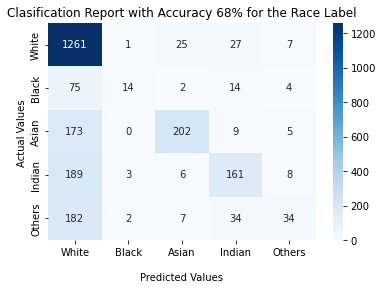

<Figure size 1080x720 with 0 Axes>

In [10]:
print(classification_report(y_pred_r,y_test_r))
print(confusion_matrix(y_pred_r,y_test_r))
t = "Clasification Report with Accuracy 68% for the Race Label"
x = ['White', 'Black', 'Asian', 'Indian', 'Others'] 
confusion_plot(y_test_r, y_pred_r, t, x, x)
score = accuracy_score(y_pred_r,y_test_r)
#scores.append(score)

fig = plt.figure(figsize=(15, 10))

In [11]:
#n_components = 10000

### this is what the images looks like after pca compared to the original one

#### Balancing Labels

# Import image labels and paths to dataframe
mypath = "C:/Users/User/Desktop/CUNY/Faces_img/cropped.tar/cropped/crop_part1/"
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath +'/'+ x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns).astype({'age': 'int', 'gender': 'int', 'race': 'int'})

# Convert age to appropriate labels
filedfnona['age']=np.where((filedfnona.age<3), 0, filedfnona.age)
filedfnona['age']=np.where(((filedfnona.age>=3) & (filedfnona.age<6)), 1, filedfnona.age)
filedfnona['age']=np.where(((filedfnona.age>=6) & (filedfnona.age<9)), 2, filedfnona.age)
filedfnona['age']=np.where(((filedfnona.age>=9) & (filedfnona.age<12)), 3, filedfnona.age)
filedfnona['age']=np.where(((filedfnona.age>=12) & (filedfnona.age<21)), 4, filedfnona.age)
filedfnona['age']=np.where(((filedfnona.age>=21) & (filedfnona.age<36)), 5, filedfnona.age)
filedfnona['age']=np.where(((filedfnona.age>=36) & (filedfnona.age<51)), 6, filedfnona.age)
filedfnona['age']=np.where(((filedfnona.age>=51) & (filedfnona.age<80)), 7, filedfnona.age)
filedfnona['age']=np.where((filedfnona.age>=80), 8, filedfnona.age)

dfx = filedfnona.loc[:,'file']
dfy = filedfnona.loc[:,Labeltype]

# Get Train/Test
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)

# Get Train/Test/Validation dataset 0.25 * 8 = 0.2
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Encode training labels and initialize random over sampler
yencoded = LabelEncoder().fit_transform(y_train)
oversample = RandomOverSampler()

# Over sample until training classes are balanced
X_train_balanced, y_train_balanced = oversample.fit_resample(np.array(X_train).reshape(-1,1), yencoded)

# Of all classes, proportionally sample 10000
dxy = {'file': X_train_balanced.reshape(len(X_train_balanced)), 'label': y_train_balanced}
dfbalanced = pd.DataFrame(data = dxy)
balancedsamples = int(5000/len(set(dfbalanced.loc[:,'label'])))
dfbalancedsubset = dfbalanced.groupby('label', group_keys=False).apply(lambda x: x.sample(balancedsamples)).sample(frac=1)

# Count and print balanced classes
counter = Counter(y_train_balanced)
for k,v in counter.items():
    per = v / len(y_train_balanced) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# Count and print balanced classes subsets (Total should be 10000)
counter = Counter(dfbalancedsubset.loc[:,'label'])
for k,v in counter.items():
    per = v / len(dfbalancedsubset.loc[:,'label']) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

### training on best performing filters for age + pca

In [12]:
sobelEdgesImg = sobelEdges(images)

In [13]:
starttime = timeit.default_timer()
print("The start time is :",starttime)
y_pred_r, y_test_r = randomForest(sobelEdgesImg, filedfnona['race'])
print("The time difference is :", timeit.default_timer() - starttime)
accuracy_score(y_pred_r,y_test_r)
print(classification_report(y_pred_r,y_test_r))
print(confusion_matrix(y_pred_r,y_test_r))

The start time is : 410.851099
The time difference is : 131.277228208
              precision    recall  f1-score   support

           0       0.97      0.59      0.73      2193
           1       0.00      0.00      0.00         1
           2       0.43      0.76      0.55       200
           3       0.07      0.65      0.13        43
           4       0.03      1.00      0.05         8

    accuracy                           0.60      2445
   macro avg       0.30      0.60      0.29      2445
weighted avg       0.91      0.60      0.71      2445

[[1291   88  199  341  274]
 [   0    0    0    0    1]
 [  27    4  152    9    8]
 [   8    1    4   28    2]
 [   0    0    0    0    8]]


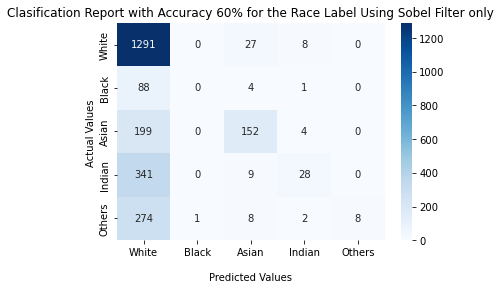

<Figure size 1080x720 with 0 Axes>

In [14]:
t = "Clasification Report with Accuracy 60% for the Race Label Using Sobel Filter only"
x = ['White', 'Black', 'Asian', 'Indian', 'Others'] 
confusion_plot(y_test_r, y_pred_r, t, x, x)
fig = plt.figure(figsize=(15, 10))

In [15]:
starttime = timeit.default_timer()
print("The start time is :",starttime)
y_pred_gender, y_test_gender = randomForest(sobelEdgesImg, filedfnona['gender'])
accuracy_score(y_pred_gender,y_test_gender)
print("The time difference is :", timeit.default_timer() - starttime)
print(classification_report(y_pred_gender,y_test_gender))
print(confusion_matrix(y_pred_gender,y_test_gender))

The start time is : 542.275299291
The time difference is : 128.73135612499993
              precision    recall  f1-score   support

           0       0.65      0.74      0.69       967
           1       0.82      0.74      0.78      1478

    accuracy                           0.74      2445
   macro avg       0.73      0.74      0.73      2445
weighted avg       0.75      0.74      0.74      2445

[[ 719  248]
 [ 385 1093]]


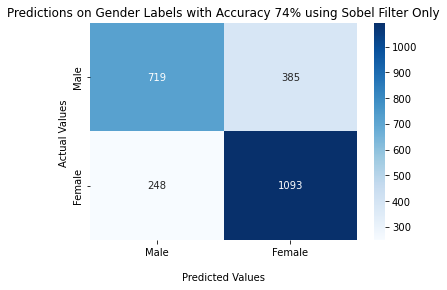

<Figure size 1080x720 with 0 Axes>

In [16]:
t = "Predictions on Gender Labels with Accuracy 74% using Sobel Filter Only"
x = ['Male', "Female"]
confusion_plot(y_test_gender, y_pred_gender, t, x, x)
#score = accuracy_score(y_pred_gender,y_test_gender)
fig = plt.figure(figsize=(15, 10))

y_pred_age, y_test_age = randomForest_pca(sobelEdgesImg, filedfnona['age'])
accuracy_score(y_pred_age,y_test_age)
print(classification_report(y_pred_age,y_test_age))
print(confusion_matrix(y_pred_age,y_test_age))
#confusion_plot(y_test_age, y_pred_age)
score = accuracy_score(y_pred_age,y_test_age)
#scores.append(score)

#fig = plt.figure(figsize=(15, 10))

In [17]:
starttime = timeit.default_timer()
print("The start time is :",starttime)
y_pred_r, y_test_r = randomForest_pca(sobelEdgesImg, filedfnona['race'])
print("The time difference is :", timeit.default_timer() - starttime)

accuracy_score(y_pred_r,y_test_r)
print(classification_report(y_pred_r,y_test_r))
print(confusion_matrix(y_pred_r,y_test_r))


The start time is : 671.130049375
The time difference is : 242.77092737500004
              precision    recall  f1-score   support

           0       0.96      0.61      0.75      2039
           1       0.00      0.00      0.00         0
           2       0.47      0.76      0.58       249
           3       0.25      0.56      0.34       151
           4       0.01      0.33      0.01         6

    accuracy                           0.62      2445
   macro avg       0.34      0.45      0.34      2445
weighted avg       0.86      0.62      0.70      2445

[[1248   93  204  249  245]
 [   0    0    0    0    0]
 [  29    6  188   11   15]
 [  25    5    9   85   27]
 [   3    0    1    0    2]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


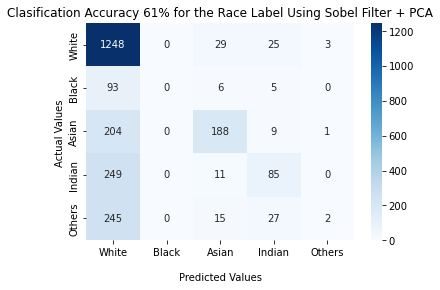

<Figure size 1080x720 with 0 Axes>

In [18]:
t = "Clasification Accuracy 61% for the Race Label Using Sobel Filter + PCA"
x = ['White', 'Black', 'Asian', 'Indian', 'Others'] 
confusion_plot(y_test_r, y_pred_r, t, x, x)
fig = plt.figure(figsize=(15, 10))

In [19]:
starttime = timeit.default_timer()
print("The start time is :",starttime)
y_pred_gender, y_test_gender = randomForest_pca(sobelEdgesImg, filedfnona['gender'])
print("The time difference is :", timeit.default_timer() - starttime)
accuracy_score(y_pred_gender,y_test_gender)
print(classification_report(y_pred_gender,y_test_gender))
print(confusion_matrix(y_pred_gender,y_test_gender))


The start time is : 914.130429375
The time difference is : 228.51706416599995
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1066
           1       0.76      0.74      0.75      1379

    accuracy                           0.73      2445
   macro avg       0.72      0.72      0.72      2445
weighted avg       0.73      0.73      0.73      2445

[[ 751  315]
 [ 355 1024]]


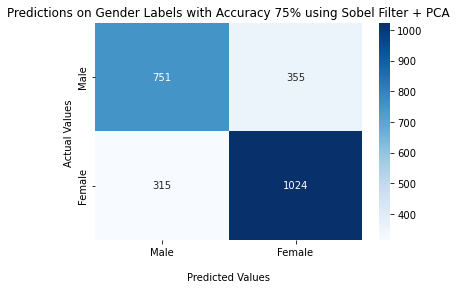

<Figure size 1080x720 with 0 Axes>

In [20]:
t = "Predictions on Gender Labels with Accuracy 75% using Sobel Filter + PCA"
x = ['Male', "Female"]
confusion_plot(y_test_gender, y_pred_gender, t, x, x)
#score = accuracy_score(y_pred_gender,y_test_gender)
fig = plt.figure(figsize=(15, 10))




y_pred_age, y_test_age = randomForestPcaSobel(np.array(images), filedfnona['age'])
accuracy_score(y_pred_age,y_test_age)
print(classification_report(y_pred_age,y_test_age))
print(confusion_matrix(y_pred_age,y_test_age))
confusion_plot(y_test_age, y_pred_age)
score = accuracy_score(y_pred_age,y_test_age)
#scores.append(score)

fig = plt.figure(figsize=(15, 10))

In [21]:
adaptist = adaptistEqualizer(images)

In [22]:
starttime = timeit.default_timer()
print("The start time is :",starttime)
y_pred_r, y_test_r = randomForest(adaptist, filedfnona['race'])

print("The time difference is :", timeit.default_timer() - starttime)
accuracy_score(y_pred_r,y_test_r)
print(classification_report(y_pred_r,y_test_r))
print(confusion_matrix(y_pred_r,y_test_r))

The start time is : 1196.105542125
The time difference is : 175.6892083329999
              precision    recall  f1-score   support

           0       0.97      0.62      0.76      2045
           1       0.03      0.75      0.06         4
           2       0.49      0.76      0.60       270
           3       0.22      0.75      0.33       104
           4       0.07      0.82      0.12        22

    accuracy                           0.64      2445
   macro avg       0.36      0.74      0.37      2445
weighted avg       0.88      0.64      0.71      2445

[[1265   84  206  268  222]
 [   0    3    0    0    1]
 [  24    5  204   16   21]
 [   8    5    4   78    9]
 [   3    0    1    0   18]]


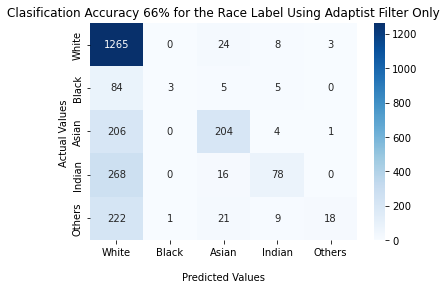

<Figure size 1080x720 with 0 Axes>

In [23]:
t = "Clasification Accuracy 66% for the Race Label Using Adaptist Filter Only"
x = ['White', 'Black', 'Asian', 'Indian', 'Others'] 
confusion_plot(y_test_r, y_pred_r, t, x, x)
fig = plt.figure(figsize=(15, 10))

In [24]:
starttime = timeit.default_timer()
print("The start time is :",starttime)
y_pred_gender, y_test_gender = randomForest(adaptist, filedfnona['gender'])
print("The time difference is :", timeit.default_timer() - starttime)
accuracy_score(y_pred_gender,y_test_gender)
print(classification_report(y_pred_gender,y_test_gender))
print(confusion_matrix(y_pred_gender,y_test_gender))

The start time is : 1371.941773958
The time difference is : 123.04385141699981
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1018
           1       0.82      0.79      0.80      1427

    accuracy                           0.78      2445
   macro avg       0.77      0.77      0.77      2445
weighted avg       0.78      0.78      0.78      2445

[[ 770  248]
 [ 299 1128]]


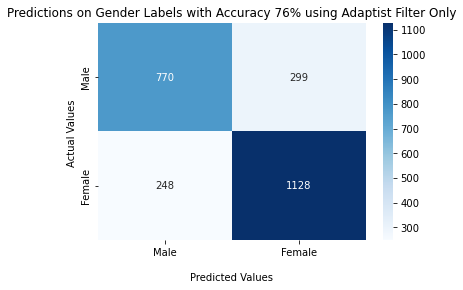

<Figure size 1080x720 with 0 Axes>

In [25]:
t = "Predictions on Gender Labels with Accuracy 76% using Adaptist Filter Only"
x = ['Male', "Female"]
confusion_plot(y_test_gender, y_pred_gender, t, x, x)
#score = accuracy_score(y_pred_gender,y_test_gender)
fig = plt.figure(figsize=(15, 10))

In [26]:
sobel_channel = sobelChannel(images)

In [27]:
starttime = timeit.default_timer()
print("The start time is :",starttime)
y_pred_r, y_test_r = randomForest(sobel_channel, filedfnona['race'])
print("The time difference is :", timeit.default_timer() - starttime)
accuracy_score(y_pred_r,y_test_r)
print(classification_report(y_pred_r,y_test_r))
print(confusion_matrix(y_pred_r,y_test_r))

The start time is : 1515.551448083


KeyboardInterrupt: 

In [ ]:
t = "Clasification Accuracy 61% using Race Label with Sobel Channels Filter Only"
x = ['White', 'Black', 'Asian', 'Indian', 'Others'] 
confusion_plot(y_test_r, y_pred_r, t, x, x)
fig = plt.figure(figsize=(15, 10))

In [ ]:
starttime = timeit.default_timer()
print("The start time is :",starttime)
y_pred_gender, y_test_gender = randomForest(sobel_channel, filedfnona['gender'])
print("The time difference is :", timeit.default_timer() - starttime)
accuracy_score(y_pred_gender,y_test_gender)
print(classification_report(y_pred_gender,y_test_gender))
print(confusion_matrix(y_pred_gender,y_test_gender))

In [ ]:
t = "Predictions on Gender Labels. Accuracy:74% using Sobel Channels Filter Only"
x = ['Male', "Female"]
confusion_plot(y_test_gender, y_pred_gender, t, x, x)
#score = accuracy_score(y_pred_gender,y_test_gender)
fig = plt.figure(figsize=(15, 10))

In [ ]:
#adaptist = adaptistEqualizer(images)
starttime = timeit.default_timer()
print("The start time is :",starttime)
y_pred_r, y_test_r = randomForest_pca(adaptist, filedfnona['race'])
print("The time difference is :", timeit.default_timer() - starttime)
accuracy_score(y_pred_r,y_test_r)
print(classification_report(y_pred_r,y_test_r))
print(confusion_matrix(y_pred_r,y_test_r))


In [ ]:
t = "Clasification Accuracy 67% for the Race Label Using Adaptist +PCA Histogram Filter"
x = ['White', 'Black', 'Asian', 'Indian', 'Others'] 
confusion_plot(y_test_r, y_pred_r, t, x, x)

score = accuracy_score(y_pred_r,y_test_r)
#scores.append(score)

fig = plt.figure(figsize=(15, 10))

y_pred_gender, y_test_gender = randomForest_pca(adaptist, filedfnona['gender'])
accuracy_score(y_pred_gender,y_test_gender)
print(classification_report(y_pred_gender,y_test_gender))
print(confusion_matrix(y_pred_gender,y_test_gender))


t = "Predictions on Gender Labels with Accuracy using Adaptist Histogram Filter"
x = ['Male', "Female"]
confusion_plot(y_test_gender, y_pred_gender)
score = accuracy_score(y_pred_gender,y_test_gender)
#scores.append(score)

fig = plt.figure(figsize=(15, 10))

#### best performing filters for age + pca

### best performing filter for race + pca

#### random forest and sift

import pandas as pd
import numpy as np
from PIL import Image
from os import listdir
from os.path import isfile, join
#import tensorflow as tf
import cv2
#from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#from keras import Model
#from tensorflow.keras.layers import Input,Activation,Add, MaxPooling2D, Flatten, Dense
import gc

def get_descriptors(links):
    container = []
    sift = cv2.SIFT_create()
    for i in links:
        img = cv2.imread(i)
        img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        keypoint,descriptor = sift.detectAndCompute(img_bw,None)
        container.append([keypoint,descriptor])
    return container

#For a collection of image area descriptions, get the Kmeans of n clusters. This will be what future images are compared to.


def get_vocab(descriptors,n):
    descriptor_container = []
    for i in descriptors:
        if i[1] is None:
            continue
        for j in i[1]:
            descriptor_container.append(j)
    vocab = kmeans(descriptor_container,n)
    return vocab

# For each image, get its descriptors. For each descriptor, get the closest Kmean descriptor in vocab and add 1 to its index in a histogram.
# Return a histogram per image. This histogram will be passed as a feature for modeling.

def descriptor_to_vocab(nparrays,vocab):
    sift = cv2.SIFT_create()
    container = []
    for i in nparrays:
        img_bw = i
        if(len(i.shape)==3):
            img_bw = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
        keypoint,descriptor = sift.detectAndCompute(img_bw,None)
        if descriptor is not None:
            dist = cdist(descriptor,vocab[0],'euclidean')
            bin_assignment = np.argmin(dist,axis = 1)
        else:
            bin_assignment = []
        image_feats = np.zeros(len(vocab[0]))
        for j in bin_assignment:
            image_feats[j] += 1
        container.append(image_feats)
    return container

# Normalizes histograms from images so that they may be used in ML inputs

def normalize_histograms(histarray):
    histarray = np.array(histarray)
    feats_norm_div = np.linalg.norm(histarray,axis = 1)
    for i in range(0,histarray.shape[0]):
        divi = feats_norm_div[i]
        histarray[i] = histarray[i]/divi
        if(np.isnan(histarray[i][0])):
            histarray[i] = np.zeros(len(histarray[i]))
    return histarray

# Pipeline for SIFT to histogram features per image
# Returns a dataframe for training and testing datasets
'''
path - path to the image directory
column - what type of label to return
nvocab - how many vectors will appear in the descriptor 'vocabulary'
test_size - percentage of images that will be used as tests
random_state - seed for randomization
n_features - For each image, return at most n descriptors
'''

def SIFT_path_to_Features(path,column,nvocab = 200,test_size = 0.33,random_state = 42,n_features = 100):
    filedf = md.get_image_label_filepath_df('./Data/CroppedImages/')
    X,y = md.get_labels_npimages(filedf,column)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train_np = np.array(X_train)
    X_test_np = np.array(X_test)
    y_train_np = np.array(y_train)
    y_test_np = np.array(y_test)
    descriptors = get_descriptors(X_train_np[:,1],n_features)
    vocab = get_vocab(descriptors[:100],nvocab)
    histarraytrain = descriptor_to_vocab(X_train_np[:,1],vocab)
    histarraytest = descriptor_to_vocab(X_test_np[:,1],vocab)
    normalizehisttrain = normalize_histograms(histarraytrain)
    normalizehisttest = normalize_histograms(histarraytest)
    traindf = pd.DataFrame((X_train_np[:,0],normalizehisttrain,y_train_np))
    testdf = pd.DataFrame((X_test_np[:,0],normalizehisttest,y_test_np))
    traindf = traindf.transpose()
    testdf = testdf.transpose()
    return [traindf,testdf]

# X[:,0] should be file names and X[:,1] should be nparrays of images

def SIFT_nparray_to_Features(X_train,X_test,nvocab = 200,n_features = 100):
    X_train_np = np.array(X_train)
    X_test_np = np.array(X_test)
    descriptors = get_descriptors(X_train_np,n_features)
    vocab = get_vocab(descriptors[:100],nvocab)
    histarraytrain = descriptor_to_vocab(X_train_np,vocab)
    histarraytest = descriptor_to_vocab(X_test_np,vocab)
    normalizehisttrain = normalize_histograms(histarraytrain)
    normalizehisttest = normalize_histograms(histarraytest)
    nonantrain = np.nan_to_num(normalizehisttrain)
    nonantest = np.nan_to_num(normalizehisttest)
    return nonantrain,nonantest

def SIFT_np_to_Features(filenames,X,y,nvocab = 200,test_size = 0.33,random_state = 42,n_features = 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train_np = np.array(X_train)
    X_test_np = np.array(X_test)
    y_train_np = np.array(y_train)
    y_test_np = np.array(y_test)
    descriptors = get_descriptors(X_train_np,n_features)
    vocab = get_vocab(descriptors[:100],nvocab)
    histarraytrain = descriptor_to_vocab(X_train_np,vocab)
    histarraytest = descriptor_to_vocab(X_test_np,vocab)
    normalizehisttrain = normalize_histograms(histarraytrain)
    normalizehisttest = normalize_histograms(histarraytest)
    traindf = pd.DataFrame((filenames,normalizehisttrain,y_train_np))
    testdf = pd.DataFrame((filenames,normalizehisttest,y_test_np))
    traindf = traindf.transpose()
    testdf = testdf.transpose()
    return [traindf,testdf]
def get_similarity(train,queries):
    matcher = cv2.BFMatcher()
    similarity = []
    for j in train:
        container = []
        for i in queries:
            if(any(elem is None for elem in [i[0],i[1],j[0],j[1]])):
                container.append(0)
                continue
            matches = matcher.knnMatch(i[1],j[1], k=2)
            number_keypoints = 0
            if len(j[0]) <= len(i[0]):
                number_keypoints = len(j[0])
            else:
                number_keypoints = len(i[0])
            # Apply ratio test
            good = []
            for m,n in matches:
                if m.distance < 0.75*n.distance:
                    good.append([m])        
            
            percent=(len(good)*100)/number_keypoints
            container.append(percent)
        similarity.append(container)
    return similarity


def get_image_average(links):
    img_container = []
    for i in links:
        img = cv2.imread(i)
        img_container.append(img)
    return np.mean(img_container,axis = 0)

#mypath = "./Data/CroppedImages/"
mypath = "/Users/jenifervivar/Desktop/Desktop - jenifer’s MacBook Air/Machine_learning_code/crop_part1/"
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns)

genderzerodf = filedf[filedf['gender'] == '0']
genderonedf = filedf[filedf['gender'] == '1']
traingender = genderzerodf.groupby('age', group_keys=False).apply(lambda x: x.sample(frac = 0.2))

testzero = genderzerodf.groupby('age', group_keys=False).apply(lambda x: x.sample(frac = 0.5))
# Get '1' test examples
testone = genderonedf.groupby('age', group_keys=False).apply(lambda x: x.sample(frac = 0.5))

train = get_descriptors(traingender.loc[:,'file'])
test0 = get_descriptors(testzero.loc[:,'file'])
test1 = get_descriptors(testone.loc[:,'file'])

similarityzero = get_similarity(train,test0[:100])
similarityone = get_similarity(train,test1[:100])

np.mean(similarityzero)

np.mean(similarityone)

gender_zero_img = get_image_average(genderzerodf.loc[:,'file'])
gender_zero_img

In [ ]:
plt.imshow(gender_zero_img)

In [ ]:
from PIL import Image
im = Image.fromarray(gender_zero_img.astype(np.uint8))
im.save("test_zero_img.png")

In [ ]:
gender_one_img = get_image_average(genderonedf.loc[:,'file'])

In [ ]:
sift = cv2.SIFT_create()
#sift = cv2.xfeatures2d.SIFT_create()
img = cv2.imread(filedfnona['file'][0])

img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
keypoint,descriptor = sift.detectAndCompute(img_bw,None)
similarity_zero_avg = get_similarity([[keypoint_mean,descriptor_mean]],test0)

In [ ]:
sift_image = cv2.drawKeypoints(img_bw, keypoint, img)
# show the image
cv2.imshow('image', sift_image)
# save the image
cv2.imwrite("table-sift.jpg", sift_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
plt.imshow(similarity_zero_avg)

### dummy comparison, is it doing better than a nonse model?

#### ROC curves

In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Compute ROC curve and ROC area for each class

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()